In [ ]:
#Exploratory Data Analysis

In [134]:
import pandas as pd
import os.path
from os import path
import os
import numpy as np
import pandas as pd
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime

if path.exists('./raw_data.csv'):
    data = pd.read_csv('./raw_data.csv')
    data['hour'] = data['date'].astype('datetime64[ns]').dt.hour
    display(data)
    print (data.size)

,site,battery_power,site_power,solar_power,date,hour
0,134a3fa6,-1158.00,484.48,1194.36,2021-07-02 17:34:24+00:00,17
1,8d9fed87,-3461.67,1222.92,3499.83,2021-07-02 17:34:25+00:00,17
2,5688ed10,-1.67,-1389.69,1786.21,2021-07-02 17:34:25+00:00,17
3,2b33a48d,NaN,NaN,NaN,2021-07-02 17:34:26+00:00,17
4,07333ad0,-10.00,-5543.65,8171.82,2021-07-02 17:34:26+00:00,17
...,...,...,...,...,...,...
6841,eec02ec5,0.00,-1258.07,2232.49,2021-07-02 21:04:06+00:00,21
6842,90791ae9,NaN,NaN,NaN,2021-07-02 21:04:07+00:00,21
6843,49b6c0dd,0.00,-3869.65,-4936.00,2021-07-02 21:04:07+00:00,21
6844,d0926969,NaN,17.33,3957.93,2021-07-02 21:04:07+00:00,21


41076


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           6846 non-null   object 
 1   battery_power  6002 non-null   float64
 2   site_power     5922 non-null   float64
 3   solar_power    5922 non-null   float64
 4   date           6846 non-null   object 
 5   hour           6846 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 321.0+ KB


In [136]:
data.shape

(6846, 6)

In [137]:
data.head()

,site,battery_power,site_power,solar_power,date,hour
0,134a3fa6,-1158.00,484.48,1194.36,2021-07-02 17:34:24+00:00,17
1,8d9fed87,-3461.67,1222.92,3499.83,2021-07-02 17:34:25+00:00,17
2,5688ed10,-1.67,-1389.69,1786.21,2021-07-02 17:34:25+00:00,17
3,2b33a48d,NaN,NaN,NaN,2021-07-02 17:34:26+00:00,17
4,07333ad0,-10.00,-5543.65,8171.82,2021-07-02 17:34:26+00:00,17


In [138]:
data.tail()

,site,battery_power,site_power,solar_power,date,hour
6841,eec02ec5,0.00,-1258.07,2232.49,2021-07-02 21:04:06+00:00,21
6842,90791ae9,NaN,NaN,NaN,2021-07-02 21:04:07+00:00,21
6843,49b6c0dd,0.00,-3869.65,-4936.00,2021-07-02 21:04:07+00:00,21
6844,d0926969,NaN,17.33,3957.93,2021-07-02 21:04:07+00:00,21
6845,7435e9d3,323.33,1.66,3995.01,2021-07-02 21:04:08+00:00,21


In [139]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,6002.0,-681.695550,1692.559016,-8055.83,-1167.9175,-5.170,0.00,7781.67
site_power,5922.0,-1529.553615,2700.229181,-14290.35,-3164.5300,-108.985,10.55,8891.65
solar_power,5922.0,3857.536863,3122.367426,-5043.20,1251.8700,3928.995,6120.49,16207.38
hour,6846.0,18.796231,1.055560,17.00,18.0000,19.000,20.00,21.00


In [140]:
sites = data.site.unique()
print(sites)

['134a3fa6' '8d9fed87' '5688ed10' '2b33a48d' '07333ad0' '38c8ae33'
 'adc42b19' 'e9ba8cec' 'e12c2148' '4b78aae6' 'e724ca65' '135433c1'
 '90606897' '02ebf5c7' 'c8eb2d3d' '2b98cbdd' '39146e59' '55af2f9b'
 '28731623' '3193e230' 'e6bcf7cf' '7da0acb7' 'c18b6195' '20abb173'
 'f34b386a' 'f7f9ac09' '5fc96249' '82c74b9e' 'b255f7ad' '61bff705'
 '619fd2b9' '260f359a' '4faff963' '499a251d' 'dfc6fdf5' '64e1616f'
 '93c8a2c1' 'eec02ec5' '90791ae9' '49b6c0dd' 'd0926969' '7435e9d3']


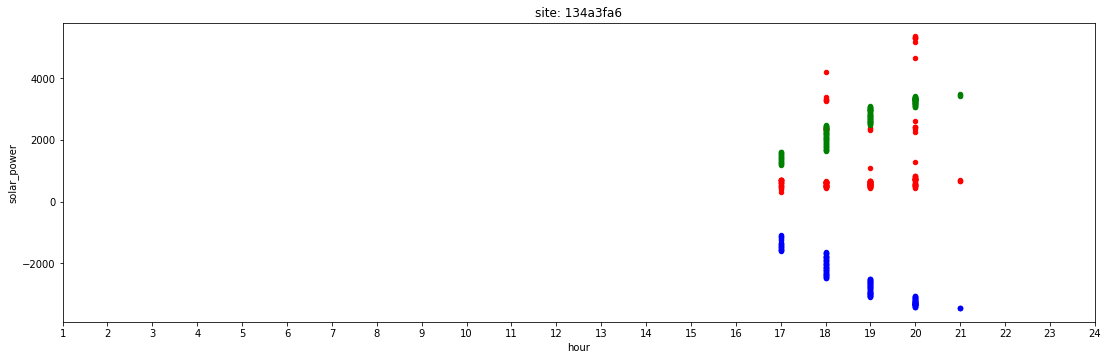

In [ ]:
# plot the data

for s in sites:
    ax = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(18.5, 5.5)
    site_data = data[data.site == s ]
    site_data.plot(kind='scatter',x='hour',y="battery_power", color='blue', ax=ax)
    site_data.plot(kind='scatter',x='hour',y="site_power", color='red', ax=ax)
    site_data.plot(kind='scatter',x='hour',y="solar_power", color='green', ax=ax)
    plt.title('site: '+s)
    plt.xticks(range(1,25))
    plt.show()